In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline


In [2]:
data=pd.read_csv('House price.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [5]:
data['date']=pd.to_datetime(data['date'])

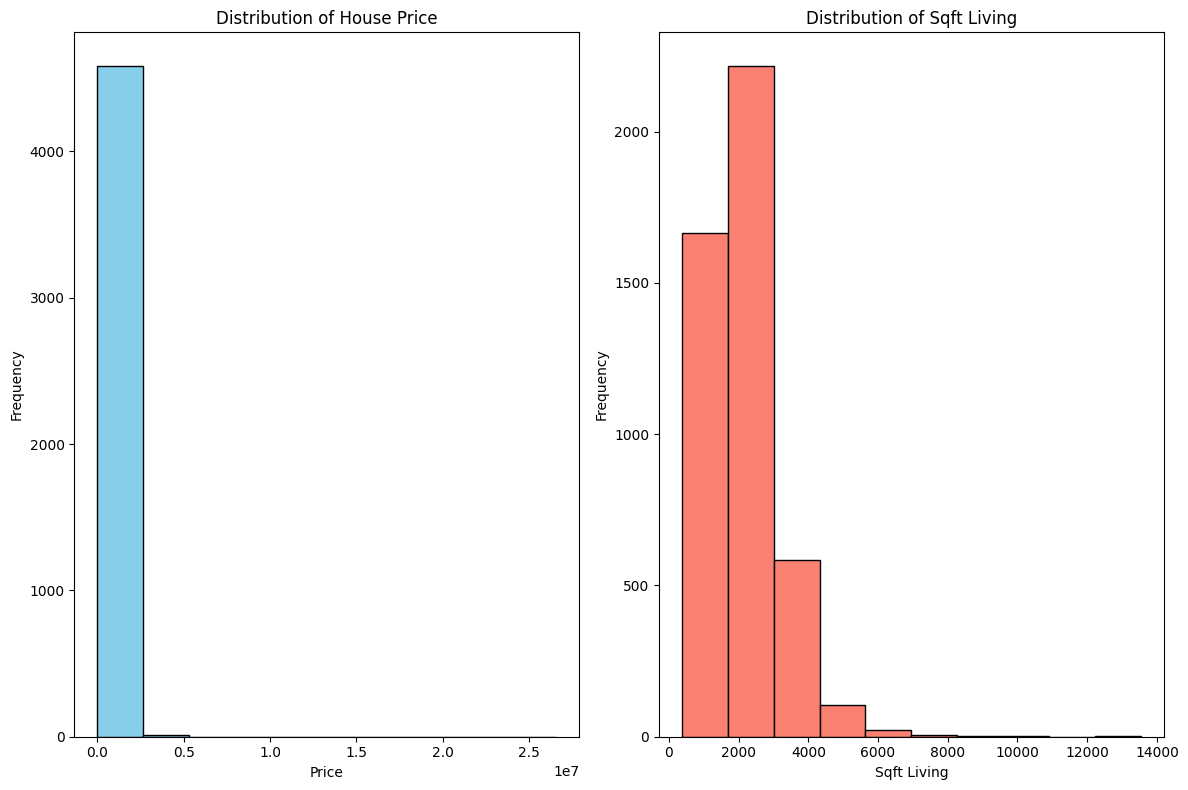

In [6]:
plt.figure(figsize=(12,8))

#plot1
plt.subplot(1,2,1)
plt.hist(data['price'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of House Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

#plot2
plt.subplot(1,2,2)
plt.hist(data['sqft_living'], bins=10, color='salmon', edgecolor='black')
plt.title('Distribution of Sqft Living')
plt.xlabel('Sqft Living')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

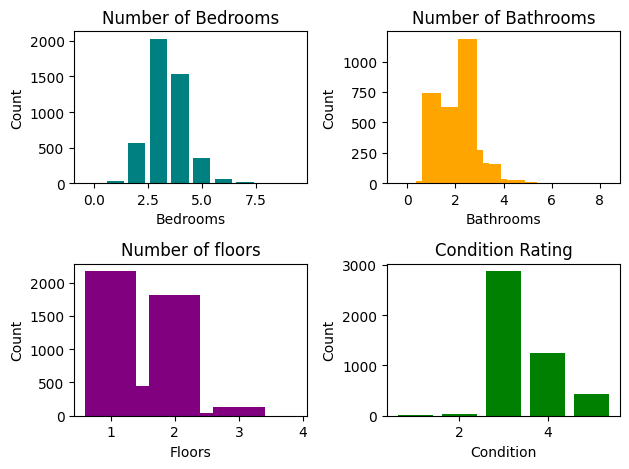

In [7]:
#plot1
plt.subplot(2,2,1)
data_bed=data['bedrooms'].value_counts()
plt.bar(data_bed.index, data_bed.values, color='teal')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')

#plot2
plt.subplot(2,2,2)
data_bath=data['bathrooms'].value_counts()
plt.bar(data_bath.index, data_bath.values, color='orange')
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')

#plot3
plt.subplot(2,2,3)
data_floors=data['floors'].value_counts()
plt.bar(data_floors.index, data_floors.values, color='purple')
plt.title('Number of floors')
plt.xlabel('Floors')
plt.ylabel('Count')

#plot4
plt.subplot(2,2,4)
data_cond=data['condition'].value_counts()
plt.bar(data_cond.index, data_cond.values, color='green')
plt.title('Condition Rating')
plt.xlabel('Condition')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

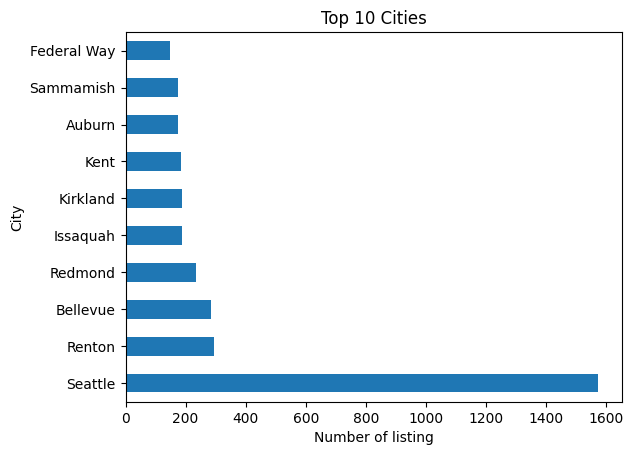

In [8]:
data['city'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 Cities')
plt.ylabel('City')
plt.xlabel('Number of listing')
plt.show()

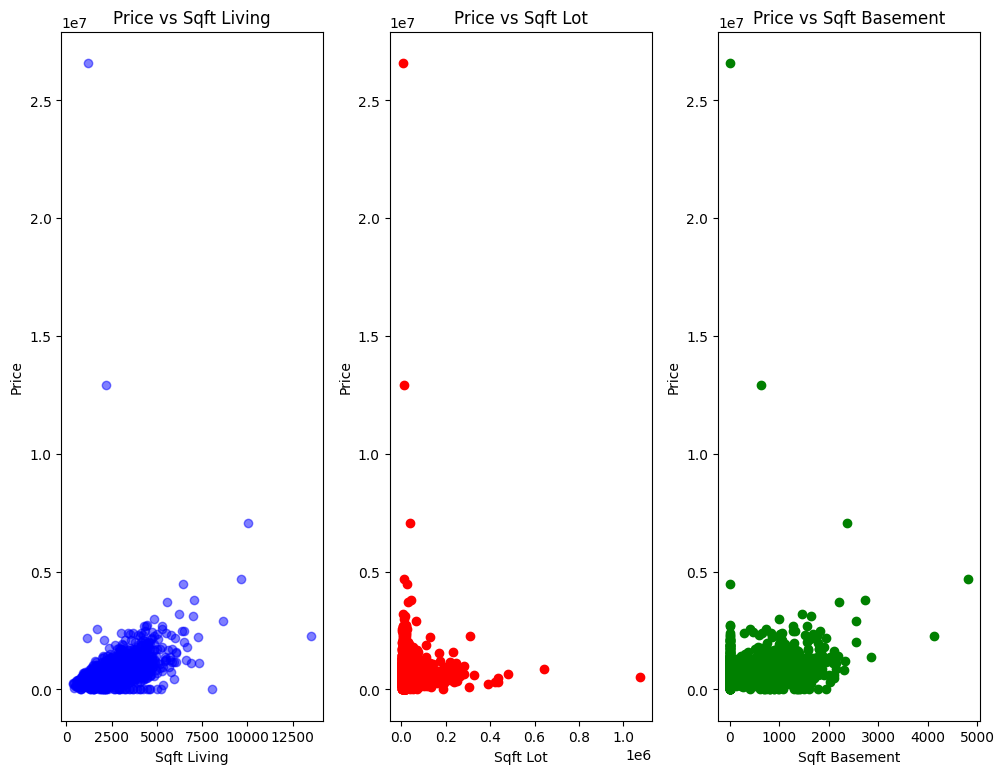

In [9]:
plt.figure(figsize=(10,8))
#plot1
plt.subplot(1,3,1)
plt.scatter(data['sqft_living'], data['price'], alpha=0.5, color='blue')
plt.title('Price vs Sqft Living')
plt.xlabel('Sqft Living')
plt.ylabel('Price')

#plot2
plt.subplot(1,3,2)
plt.scatter(data['sqft_lot'], data['price'], color='red')
plt.title('Price vs Sqft Lot')
plt.xlabel('Sqft Lot')
plt.ylabel('Price')

#plot3
plt.subplot(1,3,3)
plt.scatter(data['sqft_basement'], data['price'], color='green')
plt.title('Price vs Sqft Basement')
plt.xlabel('Sqft Basement')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

In [10]:
categories=sorted(data['bedrooms'].unique())
categories

[np.float64(0.0),
 np.float64(1.0),
 np.float64(2.0),
 np.float64(3.0),
 np.float64(4.0),
 np.float64(5.0),
 np.float64(6.0),
 np.float64(7.0),
 np.float64(8.0),
 np.float64(9.0)]

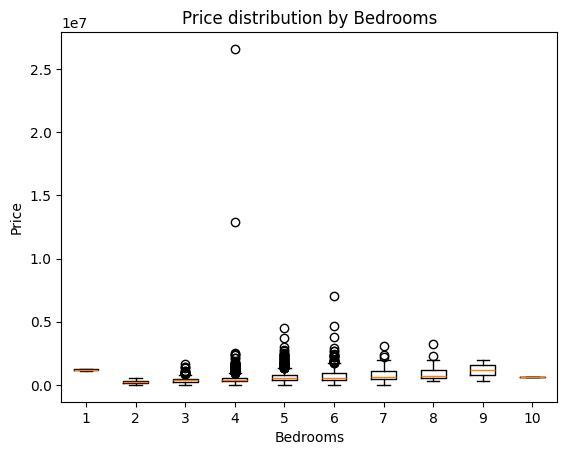

In [11]:
plot_data=[data[data['bedrooms']==cat]['price'] for cat in categories]
plt.boxplot(plot_data, label=categories)
plt.title('Price distribution by Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

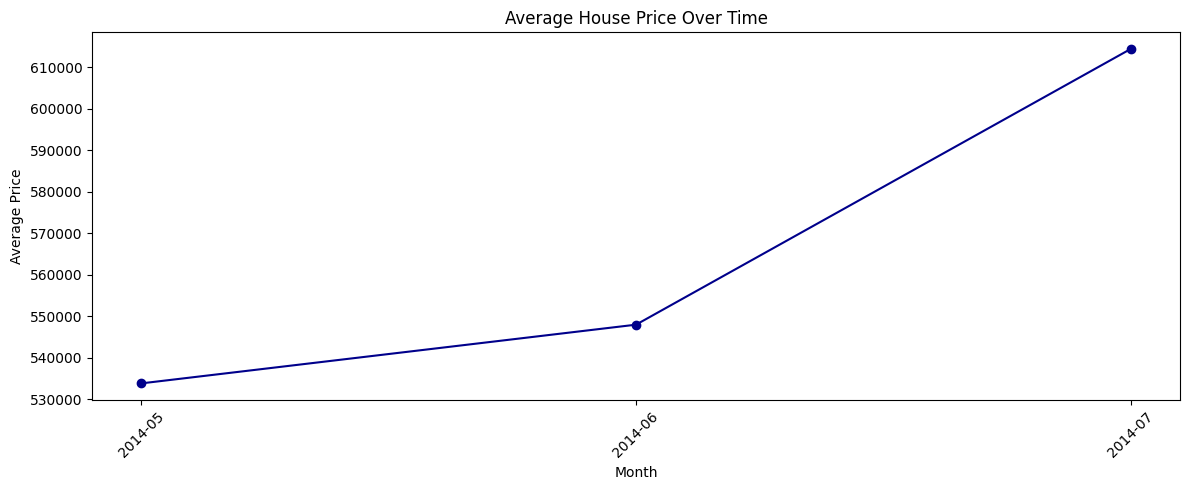

In [12]:
plt.figure(figsize=(12, 5))
monthly_avg = data.groupby(data['date'].dt.to_period('M'))['price'].mean()
monthly_avg.index = monthly_avg.index.astype(str) # Convert PeriodIndex to string for plotting
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', color='darkblue')
plt.title('Average House Price Over Time')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
data1=pd.read_csv('seattle-weather.csv')
data1.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [14]:
data1['date']=pd.to_datetime(data1['date'])

In [15]:
data1.shape

(1461, 6)

In [16]:
data1.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [17]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [18]:
data1.duplicated().sum()

np.int64(0)

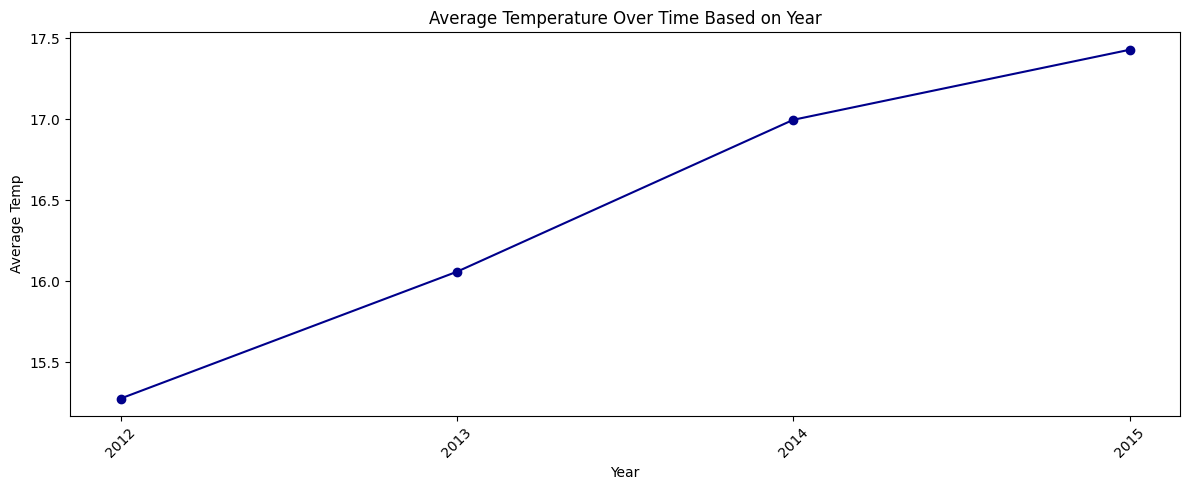

In [19]:
plt.figure(figsize=(12, 5))
yearly_avg = data1.groupby(data1['date'].dt.to_period('Y'))['temp_max'].mean()
yearly_avg.index = yearly_avg.index.astype(str) # Convert PeriodIndex to string for plotting
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', color='darkblue')
plt.title('Average Temperature Over Time Based on Year')
plt.xlabel('Year')
plt.ylabel('Average Temp')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

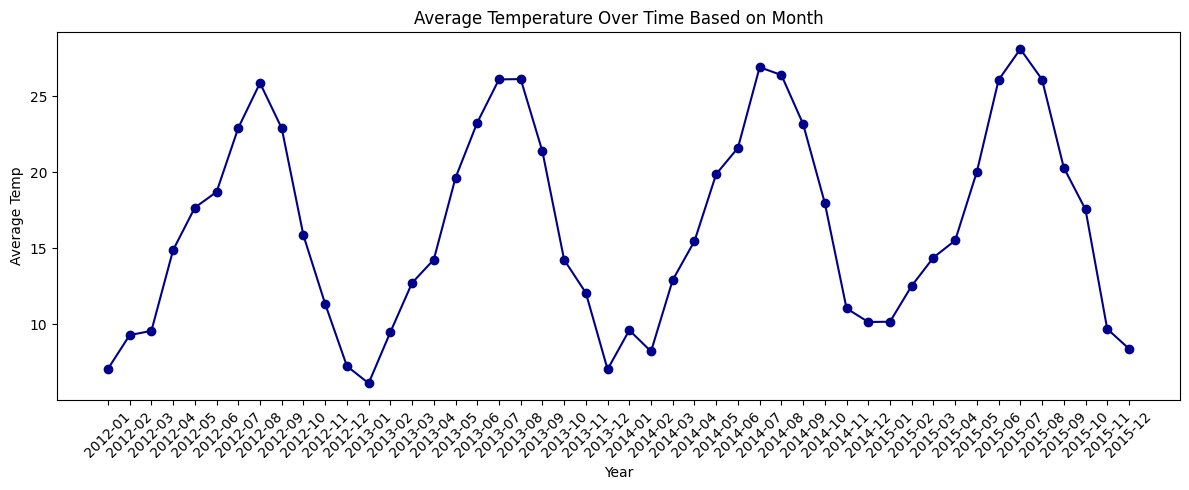

In [20]:
plt.figure(figsize=(12, 5))
monthly_avg = data1.groupby(data1['date'].dt.to_period('M'))['temp_max'].mean()
monthly_avg.index = monthly_avg.index.astype(str) # Convert PeriodIndex to string for plotting
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', color='darkblue')
plt.title('Average Temperature Over Time Based on Month')
plt.xlabel('Year')
plt.ylabel('Average Temp')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

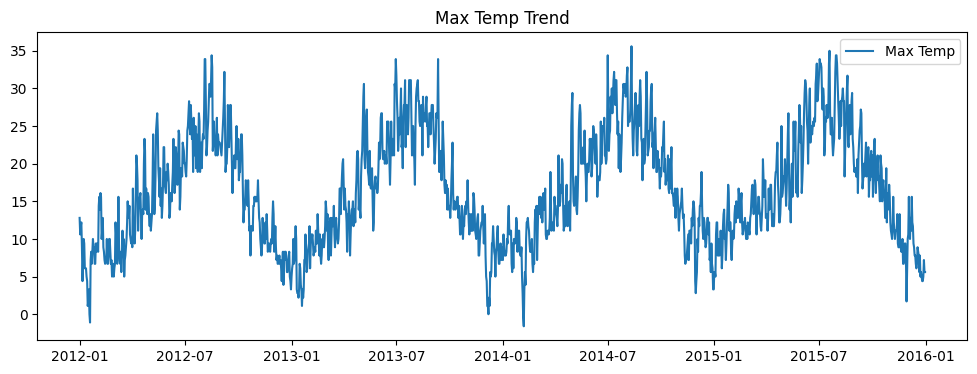

In [21]:
plt.figure(figsize=(12,4))
plt.plot(data1['date'], data1['temp_max'], label='Max Temp')
plt.title('Max Temp Trend')
plt.legend()
plt.show()

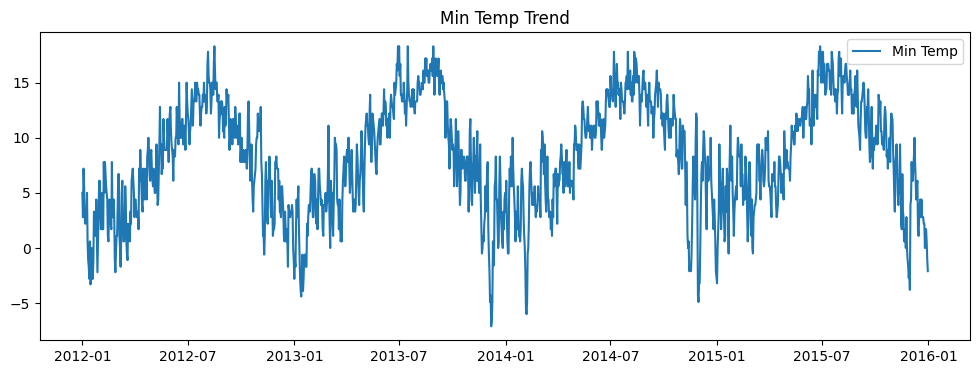

In [22]:
plt.figure(figsize=(12,4))
plt.plot(data1['date'], data1['temp_min'], label='Min Temp')
plt.title('Min Temp Trend')
plt.legend()
plt.show()

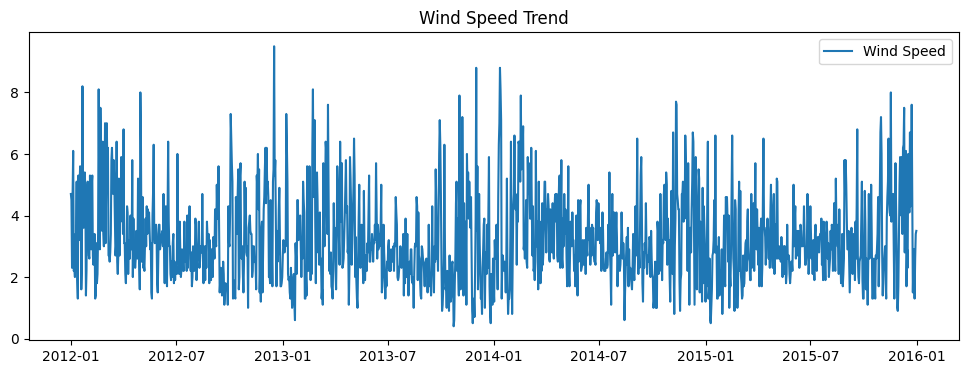

In [23]:
plt.figure(figsize=(12,4))
plt.plot(data1['date'], data1['wind'], label='Wind Speed')
plt.title('Wind Speed Trend')
plt.legend()
plt.show()

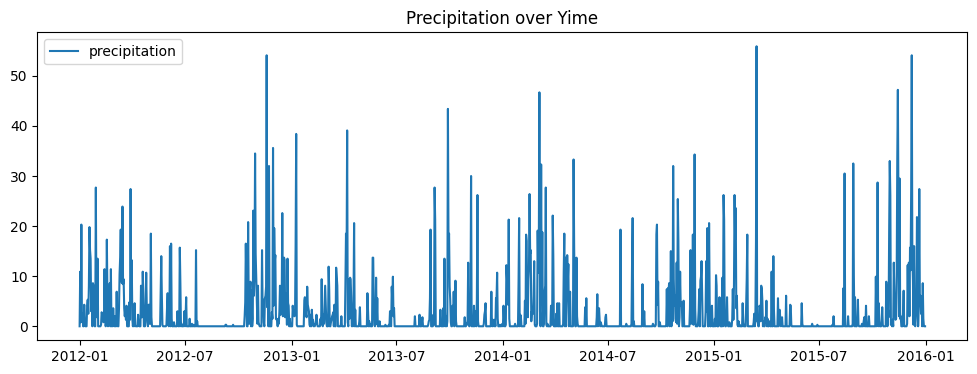

In [24]:
plt.figure(figsize=(12,4))
plt.plot(data1['date'], data1['precipitation'], label='precipitation')
plt.title('Precipitation over Yime')
plt.legend()
plt.show()